In [2]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [5]:
import nltk 

In [6]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
all_files = glob.glob('chap8/myCabinetExcelData*.xls')

all_files #출력하여 내용 확인

['chap8\\myCabinetExcelData (1).xls',
 'chap8\\myCabinetExcelData (2).xls',
 'chap8\\myCabinetExcelData (3).xls',
 'chap8\\myCabinetExcelData (4).xls',
 'chap8\\myCabinetExcelData (5).xls',
 'chap8\\myCabinetExcelData (6).xls',
 'chap8\\myCabinetExcelData (7).xls',
 'chap8\\myCabinetExcelData (8).xls',
 'chap8\\myCabinetExcelData (9).xls',
 'chap8\\myCabinetExcelData.xls']

In [9]:
all_files_data = [] #저장할 리스트 

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] #출력하여 내용 확인

Unnamed: 0   번호                                                 제목  \
0          NaN    1  Call for Special Issue Papers: Big Scientific ...   
1          NaN    2  Strength in Numbers: Using Big Data to Simplif...   
2          NaN    3  Exploiting Reused-Based Sharing Work Opportuni...   
3          NaN    4  Call for Special Issue Papers: Cloud Computing...   
4          NaN    5  Big Data in Healthcare: Opportunities and Chal...   
..         ...  ...                                                ...   
95         NaN   96  A Hierarchical Distributed Processing Framewor...   
96         NaN   97  A five-layer architecture for big data process...   
97         NaN   98  Guest Editorial: Special Issue on Big Scholar ...   
98         NaN   99  A reference architecture for big data solution...   
99         NaN  100  Towards quality-of-service driven consistency ...   

                                                   저자               출판사   출판일  
0   Anaraki, Farhad Pourkamali; Hariri-Ardebili, M...  Mary Ann Leibert  2021  
1                                             unknown  Mary Ann Leibert  2017  
2   Sahal, Radhya; Khafagy, Mohammed H.; Omara, Fa...  Mary Ann Leibert  2021  
3    Verdu, Elena; Nieto, Yuri Vanessa; Saleem, Nasir  Mary Ann Leibert  2021  
4                                             unknown  Mary Ann Leibert  2015  
..                                                ...               ...   ...  
95  Dong, L.; Lin, Z.; Liang, Y.; He, L.; Zhang, N...           unknown  2016  
96       Zhu, Julie Yixuan; Tang, Bo; Li, Victor O.K.      Inderscience  2019  
97     Lin, Y.; Tong, H.; Tang, J.; Selcuk Candan, K.           unknown  2016  
98                                      Geerdink, Bas      Inderscience  2015  
99  García-Recuero, Álvaro; Esteves, Sérgio; Veiga...      Inderscience  2014  

[100 rows x 6 columns]

In [10]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat #출력하여 내용 확인

Unnamed: 0   번호                                                 제목  \
0           NaN    1  Call for Special Issue Papers: Big Scientific ...   
1           NaN    2  Strength in Numbers: Using Big Data to Simplif...   
2           NaN    3  Exploiting Reused-Based Sharing Work Opportuni...   
3           NaN    4  Call for Special Issue Papers: Cloud Computing...   
4           NaN    5  Big Data in Healthcare: Opportunities and Chal...   
..          ...  ...                                                ...   
995         NaN   96  SOOM: Sort-Based Optimizer for Big Data Multi-...   
996         NaN   97  Artificial Bee Colony Reinforced Extended Kalm...   
997         NaN   98  Call for Special Issue Papers: Cloud Computing...   
998         NaN   99  Remotely sensed big data for the oceans and po...   
999         NaN  100                            Why Big Data = Big Deal   

                                                    저자                    출판사  \
0    Anaraki, Farhad Pourkamali; Hariri-Ardebili, M...       Mary Ann Leibert   
1                                              unknown       Mary Ann Leibert   
2    Sahal, Radhya; Khafagy, Mohammed H.; Omara, Fa...       Mary Ann Leibert   
3     Verdu, Elena; Nieto, Yuri Vanessa; Saleem, Nasir       Mary Ann Leibert   
4                                              unknown       Mary Ann Leibert   
..                                                 ...                    ...   
995  Sahal, Radhya; Khafagy, Mohammed H.; Omara, Fa...       Mary Ann Leibert   
996  Raghav, R. Srinivasa; Thirugnanasambandam, Kal...       Mary Ann Leibert   
997   Verdu, Elena; Nieto, Yuri Vanessa; Saleem, Nasir       Mary Ann Leibert   
998                                      Li, Xiao-Ming  John Wiley & Sons Ltd   
999                                            unknown       Mary Ann Leibert   

      출판일  
0    2021  
1    2017  
2    2021  
3    2021  
4    2015  
..    ...  
995  2020  
996  2022  
997  2022  
998  2022  
999  2014  

[1000 rows x 6 columns]

In [11]:
all_files_data_concat.to_csv('chap8/riss_bigdata.csv', encoding='utf-8', index = False)

In [12]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title #출력하여 내용 확인

0      Call for Special Issue Papers: Big Scientific ...
1      Strength in Numbers: Using Big Data to Simplif...
2      Exploiting Reused-Based Sharing Work Opportuni...
3      Call for Special Issue Papers: Cloud Computing...
4      Big Data in Healthcare: Opportunities and Chal...
                             ...                        
995    SOOM: Sort-Based Optimizer for Big Data Multi-...
996    Artificial Bee Colony Reinforced Extended Kalm...
997    Call for Special Issue Papers: Cloud Computing...
998    Remotely sensed big data for the oceans and po...
999                              Why Big Data = Big Deal
Name: 제목, Length: 1000, dtype: object

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [20]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...


True

In [21]:
words = []  

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))    
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [22]:
print(words)  #출력하여 내용 확인

[['call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering'], ['strength', 'number', 'using', 'big', 'data', 'simplify', 'sentiment', 'classification'], ['exploiting', 'reused', 'based', 'sharing', 'work', 'opportunity', 'big', 'data', 'multiquery', 'optimization', 'flink'], ['call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot'], ['big', 'data', 'healthcare', 'opportunity', 'challenge'], ['call', 'special', 'issue', 'paper', 'deep', 'learning', 'assisted', 'big', 'data', 'analytics', 'biomedical', 'application', 'digital', 'healthcare'], ['combining', 'human', 'computing', 'machine', 'learning', 'make', 'sense', 'big', 'aerial', 'data', 'disaster', 'response'], ['agricultural', 'disaster', 'risk', 'management', 'capability', 'assessment', 'using', 'big', 'data', 'analytics'], ['big', 'data', 'application', 'guangzhou', 'restaurant', 'analysis'], ['monkeyking', 'adaptive', 'parameter', 'tunin

In [23]:
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  #작업 내용 확인

['call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering', 'strength', 'number', 'using', 'big', 'data', 'simplify', 'sentiment', 'classification', 'exploiting', 'reused', 'based', 'sharing', 'work', 'opportunity', 'big', 'data', 'multiquery', 'optimization', 'flink', 'call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot', 'big', 'data', 'healthcare', 'opportunity', 'challenge', 'call', 'special', 'issue', 'paper', 'deep', 'learning', 'assisted', 'big', 'data', 'analytics', 'biomedical', 'application', 'digital', 'healthcare', 'combining', 'human', 'computing', 'machine', 'learning', 'make', 'sense', 'big', 'aerial', 'data', 'disaster', 'response', 'agricultural', 'disaster', 'risk', 'management', 'capability', 'assessment', 'using', 'big', 'data', 'analytics', 'big', 'data', 'application', 'guangzhou', 'restaurant', 'analysis', 'monkeyking', 'adaptive', 'parameter', 'tuning', 'big', 'data', 

In [24]:
count = Counter(words2)

count   #출력하여 내용 확인

Counter({'call': 32,
         'special': 35,
         'issue': 47,
         'paper': 30,
         'big': 1114,
         'scientific': 10,
         'data': 1239,
         'machine': 27,
         'learning': 48,
         'science': 35,
         'engineering': 12,
         'strength': 1,
         'number': 2,
         'using': 58,
         'simplify': 1,
         'sentiment': 4,
         'classification': 9,
         'exploiting': 3,
         'reused': 1,
         'based': 99,
         'sharing': 8,
         'work': 9,
         'opportunity': 27,
         'multiquery': 1,
         'optimization': 23,
         'flink': 2,
         'cloud': 31,
         'computing': 26,
         'cognitive': 4,
         'iot': 9,
         'healthcare': 17,
         'challenge': 45,
         'deep': 13,
         'assisted': 5,
         'analytics': 110,
         'biomedical': 3,
         'application': 42,
         'digital': 15,
         'combining': 1,
         'human': 11,
         'make': 4,
         'se

In [25]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1239
big : 1114
analytics : 110
based : 99
analysis : 88
driven : 68
system : 59
using : 58
approach : 55
learning : 48
issue : 47
challenge : 45
model : 45
application : 42
new : 40
special : 35
science : 35
platform : 35
management : 34
algorithm : 34
health : 34
framework : 33
call : 32
cloud : 31
era : 31
paper : 30
research : 30
machine : 27
opportunity : 27
computing : 26
processing : 26
information : 25
perspective : 25
mining : 25
smart : 25
technology : 25
earth : 24
optimization : 23
business : 23
review : 23
network : 23
intelligence : 22
distributed : 22
performance : 22
use : 22
service : 21
method : 21
process : 21
development : 20
survey : 20


In [26]:
#검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count['big']
del word_count['data']

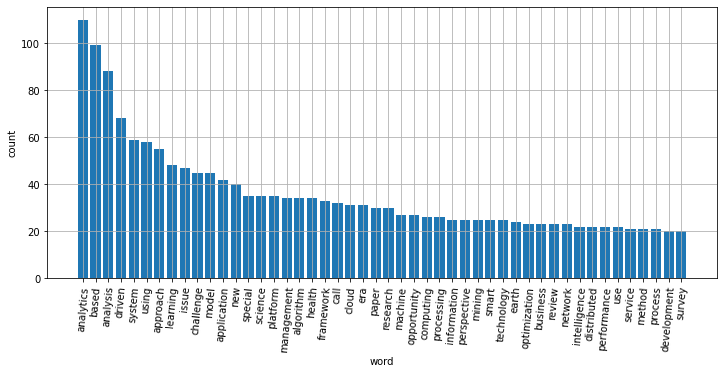

In [27]:
# 히스토그램 표시 옵션 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

In [28]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year  #출력하여 내용 확인

출판일  doc_count
0   2003          1
1   2004          1
2   2006          1
3   2008          1
4   2009          1
5   2011          7
6   2012         20
7   2013         53
8   2014        134
9   2015         95
10  2016        119
11  2017        131
12  2018        115
13  2019         87
14  2020         97
15  2021         88
16  2022         48
17  2023          1

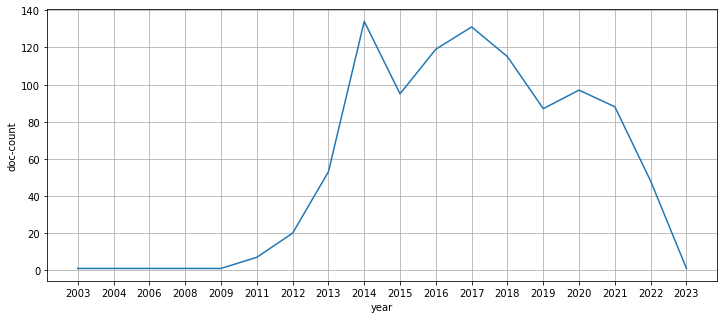

In [29]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

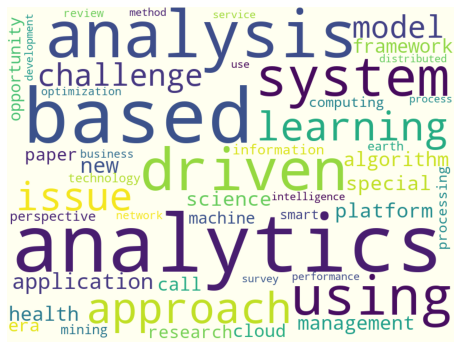

In [30]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()